In [16]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

# MitoCarta parsing

In [17]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()
name2UniprotID = MitoCarta[['Symbol','UniProt']].set_index('Symbol')['UniProt'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
MitoPW['UniProtIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

    # Collecting UniProt IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2UniprotID[gene]) == float : continue
        MitoPW.iloc[i,5] += name2UniprotID[gene].replace('|',',') + ','
    MitoPW.iloc[i,5] = MitoPW.iloc[i,5][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW)

,MitoPathway Hierarchy,Genes,PW level,EnsemblGeneIDs,UniProtIDs
MitoPathway,,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0...","Q80VP5,Q14CH7,P0CB42,Q8K1C0,P28352,Q925I1,Q9DC..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0...","P28352,Q925I1,Q6ZQJ5,O08600,Q8C163,Q80ZH7,Q3U0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0...","Q6ZQJ5,Q8C163,Q80ZH7,Q9CXC3,Q3UG70,Q9QZM2,Q8BK..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0...","Q925I1,Q8CHZ9,B9EJ57,Q8BKY8,Q91VA6,Q3UG70,Q9QZ..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0...","P28352,Q8C163,Q80ZH7,O08760,Q8K409,Q3UG70,Q6P1..."
...,...,...,...,...,...
Mitophagy,Mitochondrial dynamics and surveillance > Mito...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nipsnap1, Nip...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,O55125,Q7TMG8,Q99L..."
Autophagy,Mitochondrial dynamics and surveillance > Auto...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nbr1, Nipsnap...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,P97432,O55125,Q7TM..."
Apoptosis,Mitochondrial dynamics and surveillance > Apop...,"Aifm1, Aifm2, Aifm3, Bad, Bak1, Bax, Bbc3, Bcl...",2,"ENSMUSG00000036932,ENSMUSG00000020085,ENSMUSG0...","Q9Z0X1,Q8BUE4,Q3TY86,Q61337,O08734,Q07813,Q99M..."


# Plotting

In [30]:
PT = pd.read_csv(f'{Project}/Results/Other_papers/Martinez_etal.2023.Cell_Metabolism/Tables/Proteome/PT_Exp_calc/v20240416/Martinez_PT_Ncount.tsv', sep='\t')
display(PT)

PT_mito = pd.merge(MitoCarta[['UniProt']].drop_duplicates().rename(columns={'UniProt':'uniprot_id'}), PT, on='uniprot_id')
display(PT_mito)

,uniprot_id,Brown_a,Brown_b,Brown_c,Brown_d,Brown_e,White_a,White_b,White_c,White_d,White_e,Beige_a,Beige_b,Beige_c,Beige_d,Beige_e
0,A2A432,4.867704e+06,5.404046e+06,4.917992e+06,4.577273e+06,4.589789e+06,4.283182e+06,4.491594e+06,4.468145e+06,4.147635e+06,4.130198e+06,4.502260e+06,4.284077e+06,3.996770e+06,4.235756e+06,4.530338e+06
1,A2A5R2,5.360779e+06,5.944601e+06,4.880452e+06,5.094905e+06,5.390863e+06,4.770614e+06,4.299500e+06,5.203600e+06,3.517839e+06,4.006101e+06,5.609463e+06,4.882423e+06,4.367308e+06,5.041674e+06,6.182184e+06
2,A2A6Q5,5.754515e+05,4.862347e+05,5.204186e+05,5.652300e+05,5.685952e+05,8.385492e+05,7.911911e+05,7.897873e+05,7.581011e+05,5.841368e+05,5.443570e+05,4.713904e+05,5.384059e+05,4.732622e+05,5.012464e+05
3,A2A6T1,1.066113e+06,1.179456e+06,1.099947e+06,1.234145e+06,1.289537e+06,3.550981e+06,4.382906e+06,3.727264e+06,5.133409e+06,4.905160e+06,1.666076e+06,1.700587e+06,1.902969e+06,1.607894e+06,1.572881e+06
4,A2A8Z1,9.500069e+06,9.548385e+06,9.828142e+06,1.004048e+07,9.446971e+06,7.666750e+06,7.835905e+06,7.935979e+06,7.617329e+06,7.477954e+06,1.322189e+07,1.320671e+07,1.312956e+07,1.286644e+07,1.343275e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,Q9Z2Z6,3.959013e+07,4.830603e+07,3.689473e+07,3.701373e+07,3.523014e+07,1.216418e+07,1.165966e+07,1.304360e+07,7.294715e+06,9.359671e+06,5.468316e+07,3.964425e+07,3.505708e+07,4.091522e+07,6.741503e+07
4793,Q9Z2Z9,7.717189e+06,8.850739e+06,7.838723e+06,8.050023e+06,7.540230e+06,1.493836e+07,1.290274e+07,1.799233e+07,1.317869e+07,1.433915e+07,1.070958e+07,9.857626e+06,8.667582e+06,8.396729e+06,1.200863e+07
4794,Q9Z315,5.424869e+06,4.995477e+06,5.484528e+06,5.264227e+06,5.520932e+06,4.992333e+06,6.501844e+06,4.959858e+06,7.374719e+06,6.182872e+06,4.918820e+06,5.784571e+06,6.188551e+06,5.739643e+06,4.187080e+06
4795,Q9Z321,2.072580e+06,2.582860e+06,2.025321e+06,1.671402e+06,1.980207e+06,2.671409e+06,2.742248e+06,2.772491e+06,2.556280e+06,2.568054e+06,1.970792e+06,1.738692e+06,1.705245e+06,1.682463e+06,2.397095e+06


,uniprot_id,Brown_a,Brown_b,Brown_c,Brown_d,Brown_e,White_a,White_b,White_c,White_d,White_e,Beige_a,Beige_b,Beige_c,Beige_d,Beige_e
0,Q9D0M3,2.284971e+08,2.215829e+08,2.376860e+08,2.160281e+08,2.344989e+08,6.916940e+07,6.309332e+07,5.630674e+07,5.038974e+07,5.260722e+07,3.101226e+08,2.937463e+08,2.981228e+08,2.952572e+08,2.890846e+08
1,P35486,1.734390e+08,1.874964e+08,1.585144e+08,1.634593e+08,1.645515e+08,4.295411e+07,5.079952e+07,3.846939e+07,3.753054e+07,3.955635e+07,2.041621e+08,2.013646e+08,2.045848e+08,2.164994e+08,2.300163e+08
2,Q9D3D9,1.587484e+08,8.029651e+07,1.015760e+08,1.001105e+08,1.896683e+08,2.531385e+07,3.082115e+07,2.142298e+07,4.526790e+07,6.500830e+07,1.438026e+08,1.820532e+08,1.266912e+08,1.725168e+08,7.464502e+07
3,Q9DCB8,1.254211e+07,4.789699e+06,1.112205e+07,1.192578e+07,1.570376e+07,1.481409e+06,1.451894e+06,1.134780e+06,2.532172e+06,2.465424e+06,9.808082e+06,1.643875e+07,1.539156e+07,1.409494e+07,5.994704e+06
4,Q9D051,2.695398e+08,2.528297e+08,2.267058e+08,2.505079e+08,2.728945e+08,5.825703e+07,6.636999e+07,5.521583e+07,5.519744e+07,5.487091e+07,2.552580e+08,3.219763e+08,3.011925e+08,3.355280e+08,3.179985e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,P70677,8.297787e+06,8.768095e+06,8.236964e+06,7.969916e+06,8.562729e+06,7.200640e+06,7.590923e+06,7.790128e+06,7.492564e+06,7.305247e+06,5.233836e+06,4.797845e+06,4.721476e+06,5.129551e+06,5.092907e+06
696,Q61337,4.898685e+06,2.225581e+06,5.954828e+06,6.160373e+06,6.538569e+06,1.750361e+06,1.536690e+06,1.619382e+06,6.110079e+06,5.294310e+06,4.259364e+06,5.763800e+06,6.553469e+06,5.952239e+06,1.883530e+06
697,Q9D3P8,1.528269e+07,1.326287e+07,1.676208e+07,1.646977e+07,1.368126e+07,1.027417e+07,1.103327e+07,1.027764e+07,1.089959e+07,1.146885e+07,8.874605e+06,8.748113e+06,8.159889e+06,9.220838e+06,7.464429e+06
698,Q8BHS6,2.006760e+06,1.776289e+06,1.605458e+06,1.613498e+06,1.738156e+06,4.009717e+06,3.933523e+06,4.129638e+06,3.558553e+06,3.471183e+06,1.635730e+06,2.514835e+06,2.102945e+06,2.542569e+06,2.856781e+06


In [31]:
# Plot data
MTPWs = ['TCA cycle']

celltypes = ['Beige','Brown','White']
reps = ['a','b','c','d','e']
data = []
for MTPW in MTPWs:
    genes = pd.DataFrame({'uniprot_id' : MitoPW.loc[MTPW,'UniProtIDs'].split(',')})  
    tmp = pd.merge(genes, PT_mito[['uniprot_id']+[f'{CT}_{rep}' for CT in celltypes for rep in reps]], on='uniprot_id')
    data.append(tmp.drop(columns='uniprot_id').sum())

data = pd.concat(data, axis=1).T.rename(index={i:MTPW for i,MTPW in enumerate(MTPWs)})
for col in data:
    data[col] = data[col] / sum(PT_mito[col]) * 100
display(data)

plot_data = data.T
plot_data['Celltype'] = plot_data.index.str[:5]
plot_data['rep'] = plot_data.index.str[-1]

display(plot_data)

,Beige_a,Beige_b,Beige_c,Beige_d,Beige_e,Brown_a,Brown_b,Brown_c,Brown_d,Brown_e,White_a,White_b,White_c,White_d,White_e
TCA cycle,11.311362,11.569563,11.332028,11.448573,12.058865,11.076052,11.841206,10.525109,10.477525,10.423296,7.575761,8.221347,7.543176,6.972339,7.088485


,TCA cycle,Celltype,rep
Beige_a,11.311362,Beige,a
Beige_b,11.569563,Beige,b
Beige_c,11.332028,Beige,c
Beige_d,11.448573,Beige,d
Beige_e,12.058865,Beige,e
Brown_a,11.076052,Brown,a
Brown_b,11.841206,Brown,b
Brown_c,10.525109,Brown,c
Brown_d,10.477525,Brown,d
Brown_e,10.423296,Brown,e


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_29811/921538893.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Celltype", y="TCA cycle",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_29811/921538893.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=plot_data, x="Celltype", y="TCA cycle",


<Figure size 640x480 with 0 Axes>

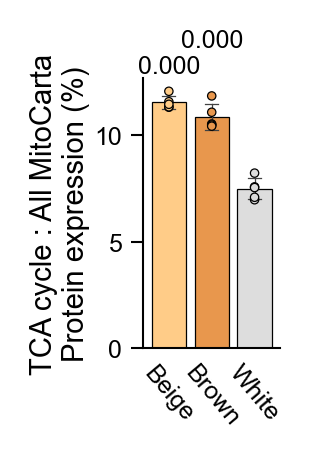

In [42]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*3 +1/70*2]
height_ratios = [0.9]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

sns.barplot(data=plot_data, x="Celltype", y="TCA cycle",
            palette=['#FFCC88','#E8974D','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=plot_data, x="Celltype", y="TCA cycle",
              palette=['#FFCC88','#E8974D','#DDDDDD'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)
# ax.axhline(2.7, c='w', lw=2, clip_on=False)

ax.set_xlim(-0.6, 2.6)
# ax.set_ylim(2.5, 4.2)
ax.set_xticks([0,1,2])
# ax.set_yticks([2.5, 3, 3.5, 4])
ax.set_xticklabels(celltypes, rotation=-50)
# ax.set_yticklabels([0, 3, 3.5, 4])
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('TCA cycle : All MitoCarta\nProtein expression (%)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


# Unpaired T-test
from scipy import stats
stat, pv = stats.ttest_ind([data['Beige_'+rep]['TCA cycle'] for rep in reps],
                           [data['White_'+rep]['TCA cycle'] for rep in reps])
ax.text(0, 12.7,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)
stat, pv = stats.ttest_ind([data['Brown_'+rep]['TCA cycle'] for rep in reps],
                           [data['White_'+rep]['TCA cycle'] for rep in reps])
ax.text(1, 13.9,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)


plt.savefig('Martinez_TCA-mito_PT_Exp-ratio_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()